## **AAI 521 Group 3 Project: Classification of Cats and Dogs**

In [62]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt
import cv2
import pathlib, random, math
#!pip install split-folders
#import splitfolders
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from matplotlib.image import imread

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install kaggle packages
! pip install -q kaggle

In [5]:
! mkdir ~/.kaggle # make directory (temp)
! cp kaggle.json ~/.kaggle/ # json permissions file
! chmod 600 ~/.kaggle/kaggle.json # read & write json file

In [6]:
! kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                       Diabetes Dataset                                      9KB  2022-10-06 08:55:25          18402        521  1.0              
akshaydattatraykhare/data-for-admission-in-the-university   Data for Admission in the University                  4KB  2022-10-27 11:05:45           5325        124  1.0              
thedevastator/jobs-dataset-from-glassdoor                   Salary Prediction                                     3MB  2022-11-16 13:52:31           1597         44  1.0              
meirnizri/covid19-dataset                                   COVID-19 Dataset    

In [7]:
# d/l dog & cat datasets
! kaggle competitions download -c 'dogs-vs-cats'

 99% 807M/812M [00:05<00:00, 174MB/s]
100% 812M/812M [00:05<00:00, 160MB/s]


In [8]:
# Unzip folders
! unzip dogs-vs-cats.zip
! unzip train.zip
! unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

# EDA 

In [118]:
# Here we will be organizing our data into a datframe.
pathTrain = '/content/train/'
fileNames = os.listdir(pathTrain)

animalType = []
imageShape = []
for name in fileNames:
    animal = name.split(".")[0]
    if animal == 'dog':
        animalType.append("Dog")
        filePath = pathTrain + name
        img = imread(filePath)
        imageShape.append(img.shape)
        
    else:
        animalType.append("Cat")
        filePath = pathTrain + name
        img = imread(filePath)
        imageShape.append(img.shape)

df = pd.DataFrame({
    'fileName':fileNames,
    'animalType':animalType,
    'imageShape':imageShape
})

In [119]:
df['imageHeight'] = df.imageShape.apply(lambda x: x[0])
df['imageWidth'] = df.imageShape.apply(lambda x: x[1])
df['imageChannels'] = df.imageShape.apply(lambda x: x[2])

# since we seperated imageShape into its part we no longer need it as a cloumn
df = df.drop(['imageShape'], axis=1)

In [120]:
# We are goint to check if there are any null values
print(df['fileName'].isnull().any())
print(df['animalType'].isnull().any())
print(df['imageHeight'].isnull().any())
print(df['imageWidth'].isnull().any())
print(df['imageChannels'].isnull().any())

False
False
False
False
False


In [121]:
print(df.head(15))
print()
# dataframe shape
print("Shape:", df.shape)

         fileName animalType  imageHeight  imageWidth  imageChannels
0    dog.9771.jpg        Dog          400         399              3
1   dog.12377.jpg        Dog          344         319              3
2     cat.834.jpg        Cat          457         491              3
3    cat.4895.jpg        Cat          395         499              3
4     cat.623.jpg        Cat          492         500              3
5   dog.10572.jpg        Dog          333         499              3
6    cat.7012.jpg        Cat          374         500              3
7   dog.12481.jpg        Dog          499         333              3
8     dog.698.jpg        Dog          500         374              3
9    cat.7149.jpg        Cat          335         448              3
10   cat.8204.jpg        Cat          250         389              3
11   dog.6140.jpg        Dog          225         256              3
12   cat.6791.jpg        Cat          375         499              3
13   dog.9527.jpg        Dog      

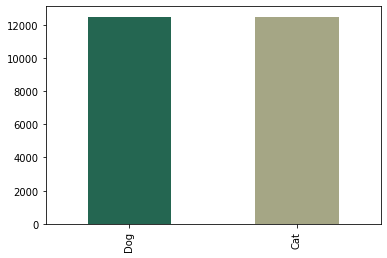

In [166]:
# Here we are going to check how many of images of each animal type we have and visualize it
Occurrence = df['animalType'].value_counts().plot(kind='bar', color=['#246651', '#a5a685'])

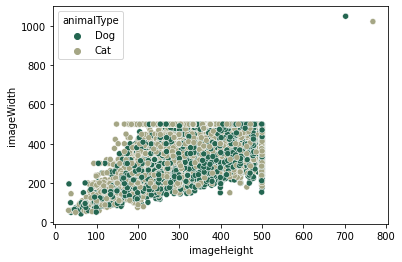

In [167]:
# We are visualizeing all the image sizes
sns.scatterplot(x=df['imageHeight'], y=df['imageWidth'], hue=df["animalType"], palette=['#246651', '#a5a685'], legend='full')

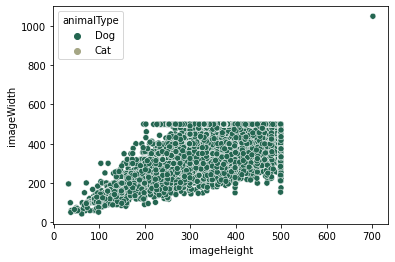

In [168]:
# This time just the dog images
dogImageDim = df[(df['animalType'] == 'Dog')]
sns.scatterplot(x=dogImageDim['imageHeight'], y=dogImageDim['imageWidth'], hue=df["animalType"], palette=['#246651', '#a5a685'], legend='full')


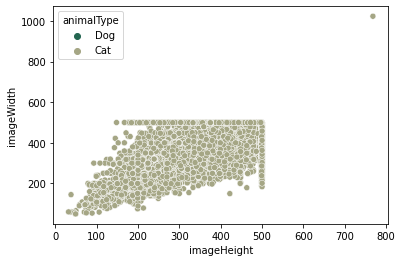

In [170]:
# This time just the cat images
catImageDim = df[(df['animalType'] == 'Cat')]
sns.scatterplot(x=catImageDim['imageHeight'], y=catImageDim['imageWidth'], hue=df["animalType"], palette=['#246651', '#a5a685'], legend='full')

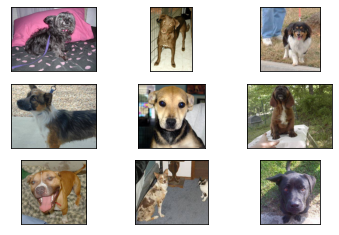

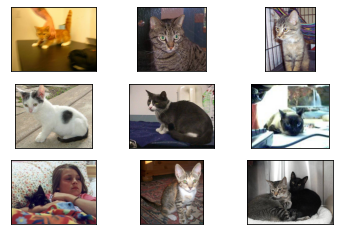

In [9]:
# plot dog & cats photos from train dataset

# define location of training dataset
folder = '/content/train/'
# plot first 9 images of dogs
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.xticks([])
    plt.yticks([])
    file = folder + 'dog.' + str(i) + '.jpg'
    image = imread(file)
    plt.imshow(image)
plt.show()

# plot first 9 images of cats
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.xticks([])
    plt.yticks([])
    file = folder + 'cat.' + str(i) + '.jpg'
    image = imread(file)
    plt.imshow(image)
plt.show()